In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
import warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
df = pd.read_csv(r"C:\Users\harsh\Downloads\Reviews.csv")

In [3]:
df.shape

(568454, 10)

In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
percentage = 0.5

# Calculate the number of rows
desired_rows = int(len(df) * (percentage / 100))
subset = df.sample(n=desired_rows)

In [6]:
subset

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
521689,521690,B000LKU3DI,AMEMYZC3GEE1K,Meli J,0,0,5,1303603200,The best protein snack,I am vegan and just came across this product n...
514184,514185,B000LQLNRM,AN3KD8V2SS7BN,BB,1,1,5,1302393600,Happy in Texas,"I suffer from a stomach disorder, and for year..."
401269,401270,B003FYUECC,AMDAE02X5LFL0,London 2012,1,1,4,1343606400,Not Las Sevillanas,I bought these and they taste great. A Mexican...
56358,56359,B003OB2H1M,A3JA2ORXXFB8FF,Topper (Linda),4,4,5,1300579200,Change is good,"Ramen is a quick and easy meal, you can doctor..."
45772,45773,B0041NYV8E,A3094EPI56GKZ6,"Kristen E. Bogren ""Kristen Bogren""",1,2,5,1334620800,Tangy Tea!,"I usually don't like Ginger tea, but wanted to..."
...,...,...,...,...,...,...,...,...,...,...
550216,550217,B002Z613JO,A3CIAUOZM72H0C,justlikeschleck,1,1,5,1301529600,Great Beans!,I bought a pack of these beans to try what Kon...
395987,395988,B000ML0V7E,A2OP61YXRFIZ30,Molly,0,0,5,1333238400,Can't have Valentine's Day without them!,"These candies are absolutely disgusting, but w..."
110420,110421,B00438XVGU,APYE89NLA3MOC,D. A. Pettengill,1,1,3,1316390400,Starbucks by mail,"I ordered the 50-""dose"" Starbucks VIA coffee f..."
568157,568158,B0069AFIN4,A3AGQAXTX6VRJ3,"David Michael ""Kahuna""",0,3,2,1333065600,"Mediocre Flavor & Brew, Not StarBucks Quality!","In 2011, when StarBucks broke away from Tassim..."


In [7]:
df_1=subset.copy()

In [8]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2842 entries, 521689 to 315276
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      2842 non-null   int64 
 1   ProductId               2842 non-null   object
 2   UserId                  2842 non-null   object
 3   ProfileName             2842 non-null   object
 4   HelpfulnessNumerator    2842 non-null   int64 
 5   HelpfulnessDenominator  2842 non-null   int64 
 6   Score                   2842 non-null   int64 
 7   Time                    2842 non-null   int64 
 8   Summary                 2841 non-null   object
 9   Text                    2842 non-null   object
dtypes: int64(5), object(5)
memory usage: 244.2+ KB


In [9]:
df_1.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,2842.000000,2842.000000,2842.000000,2842.000000,2.842000e+03
mean,282205.290289,1.673118,2.162913,4.186488,1.295393e+09
std,164928.285838,5.998924,6.693826,1.306734,4.850295e+07
min,822.000000,0.000000,0.000000,1.000000,1.013386e+09
25%,138854.750000,0.000000,0.000000,4.000000,1.268546e+09
50%,279585.000000,0.000000,1.000000,5.000000,1.309306e+09
75%,423496.250000,2.000000,2.000000,5.000000,1.332461e+09
max,568326.000000,130.000000,135.000000,5.000000,1.351210e+09


In [10]:
df_1.duplicated().sum()

0

In [11]:
df_1.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   1
Text                      0
dtype: int64

In [12]:
df_1['Score'].unique()

array([5, 4, 3, 1, 2], dtype=int64)

In [13]:
df_1['Score'] = df_1['Score'].apply(lambda x: 1 if x >= 3 else 0)

In [14]:
df_1['Score'].value_counts()

1    2431
0     411
Name: Score, dtype: int64

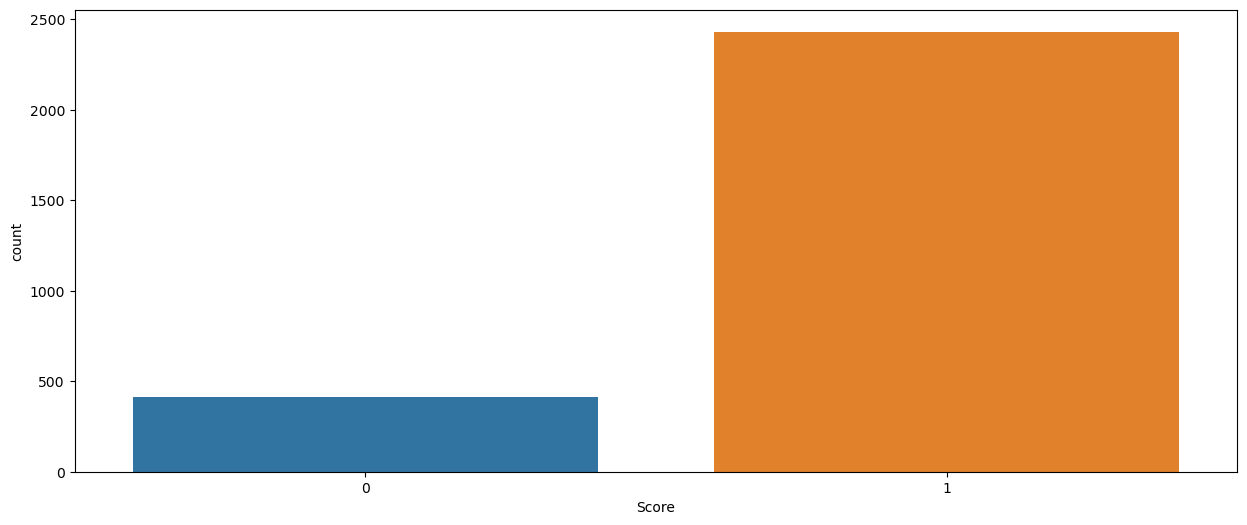

In [15]:
plt.figure(figsize=(15,6))
sns.countplot(df_1,x='Score')
plt.show()

In [16]:
balance_counts = df_1.groupby('Score')['Score'].agg('count').values
balance_counts

array([ 411, 2431], dtype=int64)

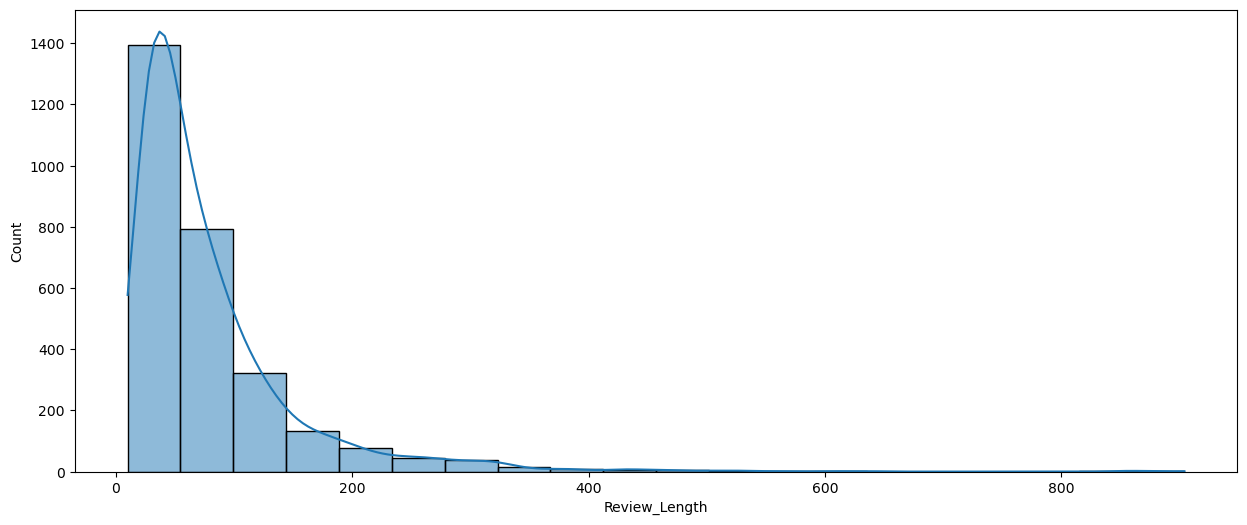

In [17]:
df_1['Review_Length']= df_1['Text'].apply(lambda x: len(x.split(' ')))
plt.figure(figsize=(15,6))
sns.histplot(df_1['Review_Length'],bins=20,kde=True,palette='hls')
plt.show()

In [18]:
df_1

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Review_Length
521689,521690,B000LKU3DI,AMEMYZC3GEE1K,Meli J,0,0,1,1303603200,The best protein snack,I am vegan and just came across this product n...,44
514184,514185,B000LQLNRM,AN3KD8V2SS7BN,BB,1,1,1,1302393600,Happy in Texas,"I suffer from a stomach disorder, and for year...",62
401269,401270,B003FYUECC,AMDAE02X5LFL0,London 2012,1,1,1,1343606400,Not Las Sevillanas,I bought these and they taste great. A Mexican...,56
56358,56359,B003OB2H1M,A3JA2ORXXFB8FF,Topper (Linda),4,4,1,1300579200,Change is good,"Ramen is a quick and easy meal, you can doctor...",154
45772,45773,B0041NYV8E,A3094EPI56GKZ6,"Kristen E. Bogren ""Kristen Bogren""",1,2,1,1334620800,Tangy Tea!,"I usually don't like Ginger tea, but wanted to...",81
...,...,...,...,...,...,...,...,...,...,...,...
550216,550217,B002Z613JO,A3CIAUOZM72H0C,justlikeschleck,1,1,1,1301529600,Great Beans!,I bought a pack of these beans to try what Kon...,32
395987,395988,B000ML0V7E,A2OP61YXRFIZ30,Molly,0,0,1,1333238400,Can't have Valentine's Day without them!,"These candies are absolutely disgusting, but w...",28
110420,110421,B00438XVGU,APYE89NLA3MOC,D. A. Pettengill,1,1,1,1316390400,Starbucks by mail,"I ordered the 50-""dose"" Starbucks VIA coffee f...",30
568157,568158,B0069AFIN4,A3AGQAXTX6VRJ3,"David Michael ""Kahuna""",0,3,0,1333065600,"Mediocre Flavor & Brew, Not StarBucks Quality!","In 2011, when StarBucks broke away from Tassim...",491


In [19]:
df_1.Review_Length.describe()

count    2842.000000
mean       78.980999
std        73.993799
min        10.000000
25%        34.000000
50%        56.000000
75%        95.000000
max       904.000000
Name: Review_Length, dtype: float64

In [20]:
df_1= df_1.copy()

In [21]:
def clean_text(text):
    text= text.lower()
    return text.strip()

In [22]:
def_new_message = df_1.Text.apply(lambda x:clean_text(x))

In [23]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
def remove_punctuation(text):
    punctuation_free = "".join([i for i in text if i not in string.punctuation])
    return punctuation_free

df_1['Text']= df_1['Text'].apply(lambda x: remove_punctuation(x))


In [25]:
import re
def tokenization(text):
    tokens= re.split('W+',text)
    return tokens

df_1['Text']= df_1['Text'].apply(lambda x:tokenization(x))


In [26]:
import nltk
stopwords =nltk.corpus.stopwords.words('english')

In [27]:
def remove_stopwords(text):
    output = "".join([i for i in text if i not in stopwords])
    return output

df_1['Text']= df_1['Text'].apply(lambda x:remove_stopwords(x))

In [28]:
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
porter_stemmer = PorterStemmer()

def stemming(text):
    words = word_tokenize(text)  # Tokenize the text into individual words
    stem_words = [porter_stemmer.stem(word) for word in words]  # Apply stemming to each word
    return ' '.join(stem_words)  # Join the stemmed words back into a single string

# Assuming df_1 is the DataFrame containing the 'Text' column
df_1['Text'] = df_1['Text'].apply(stemming)

In [29]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

wordnet_lemmatizer = WordNetLemmatizer()

def lemmatizer(text):
    words = word_tokenize(text)  # Tokenize the text into individual words
    lemm_words = [wordnet_lemmatizer.lemmatize(word) for word in words]  # Apply lemmatization to each word
    return ' '.join(lemm_words)  # Join the lemmatized words back into a single string

# Assuming df_1 is the DataFrame containing the 'Text' column
df_1['Text'] = df_1['Text'].apply(lemmatizer)


In [30]:
def clean_text(text):
    text = re.sub('\[.*\]','',text).strip()
    text= re.sub('\S*\d\S*\s*','',text).strip()
    return text.strip()


In [31]:
df_1['Text']= df_1['Text'].apply(lambda x: clean_text(x))

In [33]:
def remove_url(vTEXT):
    vTEXT = re.sub(r'(http|https)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b','',vTEXT,flags= re.MULTILINE)
    return(vTEXT)

    

In [34]:
df_1['Text']= df_1['Text'].apply(lambda x: remove_url(x))

In [35]:
def remove_digits(text):
    clean_text= re.sub(r"\b[0-9]+\b\s*","",text)
    return(text)


In [36]:
df_1['Text']= df_1['Text'].apply(lambda x: remove_digits(x))

In [37]:
def remove_digits1(sample_text):
   clean_text = " ".join([w for w in sample_text.split() if not w.isdigit()])
   return(clean_text)


In [38]:
df_1['Text']= df_1['Text'].apply(lambda x: remove_digits1(x))

In [39]:
def remove_emojis(data):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"#emotions
                               u"\U0001F300-\U0001F5FF"#symbols & pictographs
                               u"\U0001F680-\U0001F6FF"#transport and map symbols
                               u"\U0001F1E0-\U0001F1FF"#flags(ios)
                               "]+",flags=re.UNICODE)
    return re.sub(emoji_pattern,'',data)


In [40]:
df_1['Text']= df_1['Text'].apply(lambda x: remove_emojis(x))

In [41]:
df_1

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Review_Length
521689,521690,B000LKU3DI,AMEMYZC3GEE1K,Meli J,0,0,1,1303603200,The best protein snack,i am vegan and just came across thi product no...,44
514184,514185,B000LQLNRM,AN3KD8V2SS7BN,BB,1,1,1,1302393600,Happy in Texas,i suffer from a stomach disord and for year i ...,62
401269,401270,B003FYUECC,AMDAE02X5LFL0,London 2012,1,1,1,1343606400,Not Las Sevillanas,i bought these and they tast great a mexican b...,56
56358,56359,B003OB2H1M,A3JA2ORXXFB8FF,Topper (Linda),4,4,1,1300579200,Change is good,ramen is a quick and easi meal you can doctor ...,154
45772,45773,B0041NYV8E,A3094EPI56GKZ6,"Kristen E. Bogren ""Kristen Bogren""",1,2,1,1334620800,Tangy Tea!,i usual dont like ginger tea but want to give ...,81
...,...,...,...,...,...,...,...,...,...,...,...
550216,550217,B002Z613JO,A3CIAUOZM72H0C,justlikeschleck,1,1,1,1301529600,Great Beans!,i bought a pack of these bean to tri what kona...,32
395987,395988,B000ML0V7E,A2OP61YXRFIZ30,Molly,0,0,1,1333238400,Can't have Valentine's Day without them!,these candi are absolut disgust but who buy th...,28
110420,110421,B00438XVGU,APYE89NLA3MOC,D. A. Pettengill,1,1,1,1316390400,Starbucks by mail,i order the starbuck via coffe from amazon rat...,30
568157,568158,B0069AFIN4,A3AGQAXTX6VRJ3,"David Michael ""Kahuna""",0,3,0,1333065600,"Mediocre Flavor & Brew, Not StarBucks Quality!",in when starbuck broke away from tassimo bosch...,491


In [42]:
from PIL import Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator


In [43]:
import numpy as np

In [51]:
twitter_mask = np.array(Image.open(r"C:\Users\harsh\Downloads\twitter_PNG1.png"))


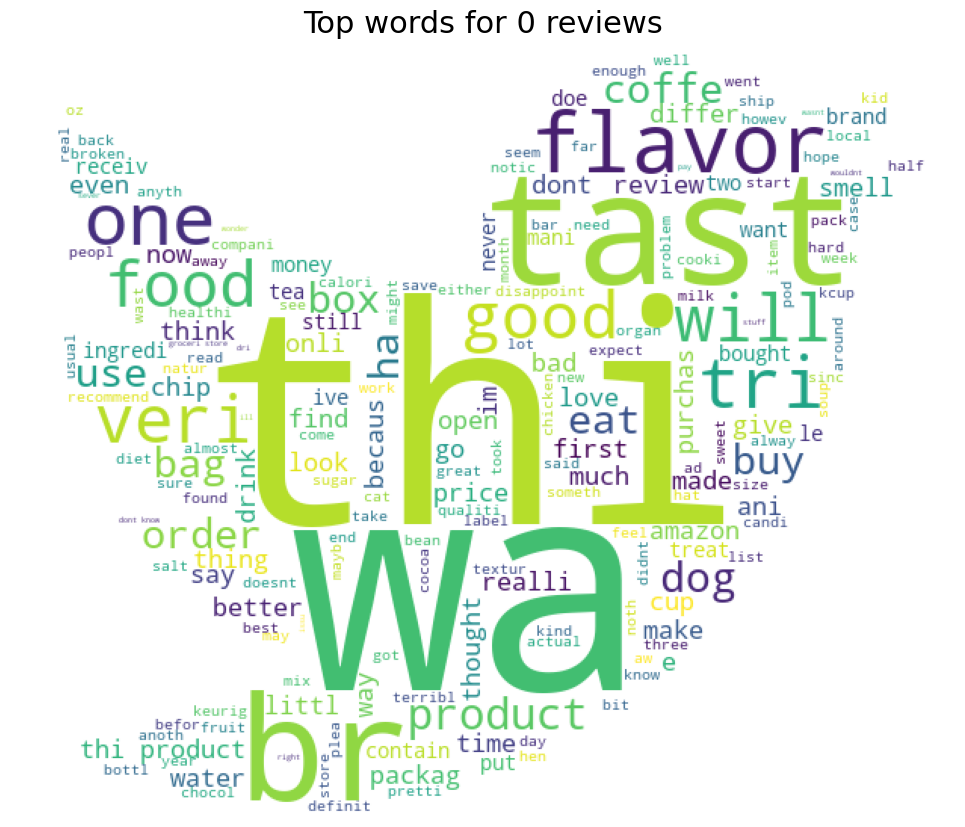

In [52]:
wc= WordCloud(background_color='white', max_words=200,mask = twitter_mask)
wc.generate(' '.join(text for text in df_1.loc[df_1['Score']== 0,'Text']))
plt.figure(figsize=(18,10))
plt.title('Top words for 0 reviews',fontdict={'size':22,'verticalalignment':'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

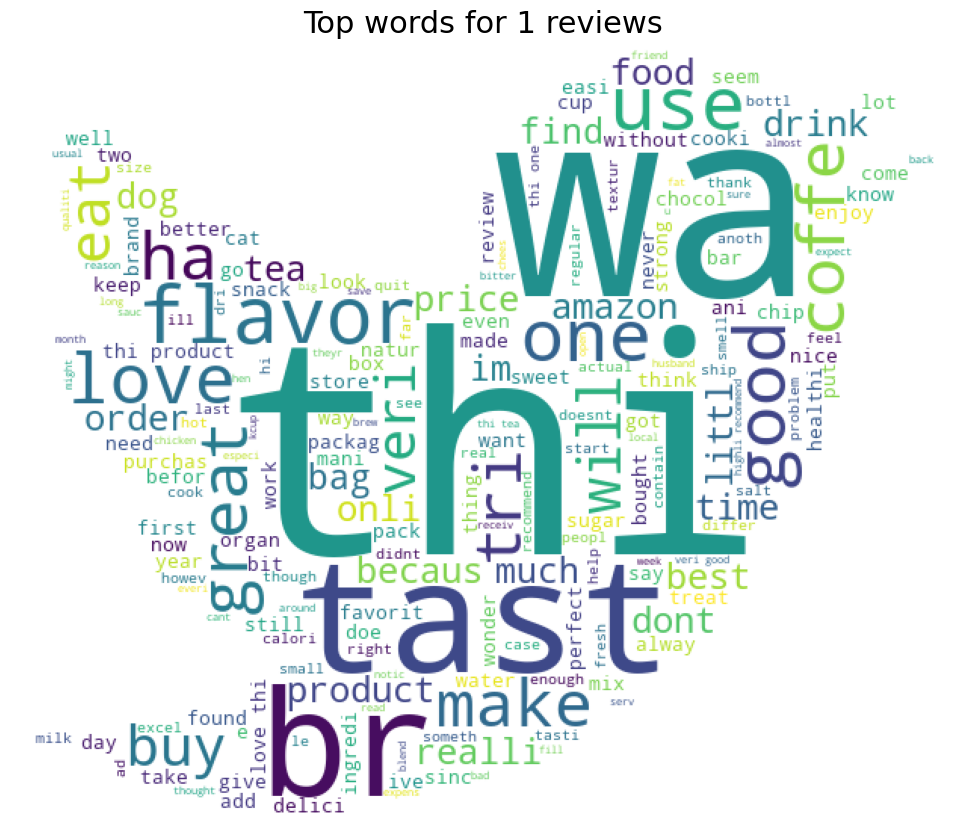

In [55]:
twitter_mask = np.array(Image.open(r"C:\Users\harsh\Downloads\twitter_PNG1.png"))
wc= WordCloud(background_color='white', max_words=200,mask = twitter_mask)
wc.generate(' '.join(text for text in df_1.loc[df_1['Score']== 1,'Text']))
plt.figure(figsize=(18,10))
plt.title('Top words for 1 reviews',fontdict={'size':22,'verticalalignment':'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

In [57]:
x= df_1['Text']
y=df_1['Score']

print(len(x),len(y))

2842 2842


In [58]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
print(len(x_train),len(x_test))
print(len(y_train),len(y_test))

1989 853
1989 853


In [59]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

In [60]:
from sklearn.naive_bayes import MultinomialNB

In [61]:
pipe = Pipeline([('bow',CountVectorizer()),('tfid',TfidfTransformer()),('model',MultinomialNB())])

In [62]:
pipe.fit(x_train,y_train)
y_pred_class = pipe.predict(x_test)

In [63]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [64]:
print(accuracy_score(y_test,y_pred_class))

0.8511137162954279


In [65]:
print(confusion_matrix(y_test,y_pred_class))

[[  0 127]
 [  0 726]]


In [66]:
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       127
           1       0.85      1.00      0.92       726

    accuracy                           0.85       853
   macro avg       0.43      0.50      0.46       853
weighted avg       0.72      0.85      0.78       853



In [67]:
import xgboost as xgb

pipe= Pipeline([('bow',CountVectorizer()),('tfid',TfidfTransformer()),('model',xgb.XGBClassifier(learning_rate=0.1,
                                                                                                max_depth= 7,
                                                                                                n_estimators=80,
                                                                                                use_label_encoder= False,
                                                                                                eval_metric='auc'))])

In [68]:
pipe.fit(x_train,y_train)
y_pred_class = pipe.predict(x_test)

In [69]:
print(accuracy_score(y_test,y_pred_class))

0.8640093786635404


In [70]:
print(confusion_matrix(y_test,y_pred_class))

[[ 22 105]
 [ 11 715]]


In [71]:
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.67      0.17      0.28       127
           1       0.87      0.98      0.92       726

    accuracy                           0.86       853
   macro avg       0.77      0.58      0.60       853
weighted avg       0.84      0.86      0.83       853

